# Practice Data Engineering with Python

Fill out the code, as necessary, below based on the directions in Canvas.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Generation
sales_data = [
    ['1001', '2023-05-01', 'P001', 'Electronics', 2, 99.99, 'C001'],
    ['1002', '2023-05-02', 'P002', 'Clothing', 1, 29.95, 'C002'],
    ['1003', '2023-05-03', 'P003', 'Books', 3, 14.99, 'C001'],
    ['1004', '2023-05-04', 'P004', 'Electronics', 1, 249.99, 'C003'],
    ['1005', '2023-05-05', 'P005', 'Clothing', 2, 39.95, 'C002'],
    ['1006', '2023-05-06', 'P001', 'Electronics', 1, 99.99, 'C004'],
    ['1007', '2023-05-07', 'P002', 'Clothing', 3, 29.95, 'C001'],
    ['1008', '2023-05-08', 'P003', 'Books', 2, 14.99, 'C003'],
    ['1009', '2023-05-09', 'P004', 'Electronics', 1, 249.99, 'C002'],
    ['1010', '2023-05-10', 'P005', 'Clothing', 1, 39.95, 'C004']]

In [4]:
# Step 2: Storage
# Data is stored in the 'sales_data.csv' file

with open('sales_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['order_id', 'order_date', 'product_id', 'product_category', 'quantity', 'unit_price', 'customer_id'])
    writer.writerows(sales_data)

In [5]:
# Step 3: Ingestion
df = pd.read_csv('sales_data.csv')
print(df.head())
print(df.info())

   order_id  order_date product_id product_category  quantity  unit_price  \
0      1001  2023-05-01       P001      Electronics         2       99.99   
1      1002  2023-05-02       P002         Clothing         1       29.95   
2      1003  2023-05-03       P003            Books         3       14.99   
3      1004  2023-05-04       P004      Electronics         1      249.99   
4      1005  2023-05-05       P005         Clothing         2       39.95   

  customer_id  
0        C001  
1        C002  
2        C001  
3        C003  
4        C002  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10 non-null     int64  
 1   order_date        10 non-null     object 
 2   product_id        10 non-null     object 
 3   product_category  10 non-null     object 
 4   quantity          10 non-null     int64  
 5   unit_p

In [7]:
# Step 4: Transformation
# Data cleaning
df = df.dropna()
df = df.drop_duplicates()
df

,order_id,order_date,product_id,product_category,quantity,unit_price,customer_id
0,1001,2023-05-01,P001,Electronics,2,99.99,C001
1,1002,2023-05-02,P002,Clothing,1,29.95,C002
2,1003,2023-05-03,P003,Books,3,14.99,C001
3,1004,2023-05-04,P004,Electronics,1,249.99,C003
4,1005,2023-05-05,P005,Clothing,2,39.95,C002
5,1006,2023-05-06,P001,Electronics,1,99.99,C004
6,1007,2023-05-07,P002,Clothing,3,29.95,C001
7,1008,2023-05-08,P003,Books,2,14.99,C003
8,1009,2023-05-09,P004,Electronics,1,249.99,C002
9,1010,2023-05-10,P005,Clothing,1,39.95,C004


In [9]:
# Formatting
df['order_date'] = pd.to_datetime(df['order_date'])
df

,order_id,order_date,product_id,product_category,quantity,unit_price,customer_id
0,1001,2023-05-01,P001,Electronics,2,99.99,C001
1,1002,2023-05-02,P002,Clothing,1,29.95,C002
2,1003,2023-05-03,P003,Books,3,14.99,C001
3,1004,2023-05-04,P004,Electronics,1,249.99,C003
4,1005,2023-05-05,P005,Clothing,2,39.95,C002
5,1006,2023-05-06,P001,Electronics,1,99.99,C004
6,1007,2023-05-07,P002,Clothing,3,29.95,C001
7,1008,2023-05-08,P003,Books,2,14.99,C003
8,1009,2023-05-09,P004,Electronics,1,249.99,C002
9,1010,2023-05-10,P005,Clothing,1,39.95,C004


In [10]:
# Feature engineering
df['total_revenue'] = df['quantity'] * df['unit_price']
df

,order_id,order_date,product_id,product_category,quantity,unit_price,customer_id,total_revenue
0,1001,2023-05-01,P001,Electronics,2,99.99,C001,199.98
1,1002,2023-05-02,P002,Clothing,1,29.95,C002,29.95
2,1003,2023-05-03,P003,Books,3,14.99,C001,44.97
3,1004,2023-05-04,P004,Electronics,1,249.99,C003,249.99
4,1005,2023-05-05,P005,Clothing,2,39.95,C002,79.90
5,1006,2023-05-06,P001,Electronics,1,99.99,C004,99.99
6,1007,2023-05-07,P002,Clothing,3,29.95,C001,89.85
7,1008,2023-05-08,P003,Books,2,14.99,C003,29.98
8,1009,2023-05-09,P004,Electronics,1,249.99,C002,249.99
9,1010,2023-05-10,P005,Clothing,1,39.95,C004,39.95


In [11]:
# Data manipulation
grouped = df.groupby('product_category')[['total_revenue', 'quantity']].agg({'total_revenue': 'sum', 'quantity': 'mean'}).reset_index()
print(grouped)

  product_category  total_revenue  quantity
0            Books          74.95      2.50
1         Clothing         239.65      1.75
2      Electronics         799.95      1.25


C:\Users\aleja\AppData\Local\Temp\ipykernel_11644\2580931001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_category', y='total_revenue', data=grouped, palette='viridis')


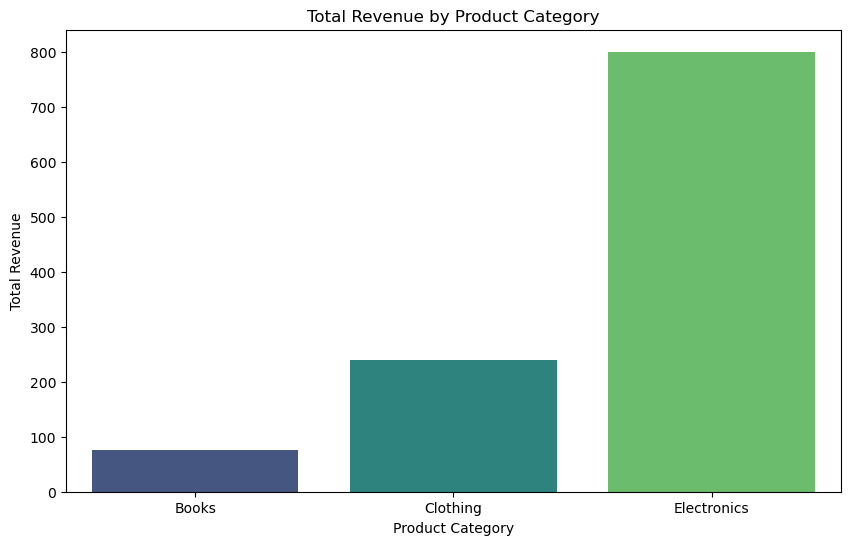

In [12]:
# Step 5: Serving Data
plt.figure(figsize=(10, 6))
sns.barplot(x='product_category', y='total_revenue', data=grouped, palette='viridis')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.show()